## 3a) Simular la secuencia $W_k$ para distintos valores de $\alpha$ y $\theta$. Describa lo observado y fundamente con gráficos apropiados.

$W_k = S_k \prod_{i=1}^{k-1}(1-S_i)$, donde $\{S_k\}_{k=1}^{\infty}$ es una secuencia de variables aleatorias independientes tal que $S_k$ proviene de una distribución $\operatorname{Beta}(1-\alpha,\theta+\alpha k)$.

Importamos las librerías/funciones necesarias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos las funciones que nos generan las secuencias $S_k$ y $W_k$ de forma parametrizada en $\alpha$ y $\theta$.

In [2]:
def simular_seq_S_k(k, alpha, theta):
    return np.random.beta(1-alpha, theta+alpha*np.arange(1, k+1))

def simular_seq_W_k(k, alpha, theta):
    Ss_k = simular_seq_S_k(k, alpha, theta)    
    return np.array([Ss_k[i-1] * np.prod(1-Ss_k[:(i-1)]) for i in range(1, k+1)])

Comprobamos mediante simulaciones que $W_k>0$ para todo número entero $k$ y que $\sum_{k=1}^{\infty}W_k = 1$. Dado que no podemos calcular la serie, veremos que las sumas parciales se aproximan a 1.

In [3]:
alpha = 0.5
theta = 2
n_ks = 1_000

In [4]:
sum_W_k = []
for i in range(1, n_ks, 30):
    if not np.all( simular_seq_W_k(i, alpha, theta) > 0 ):
        print(r'Existe $\W_k\leq0$')
    sum_W_k.append(simular_seq_W_k(i, alpha, theta).sum())

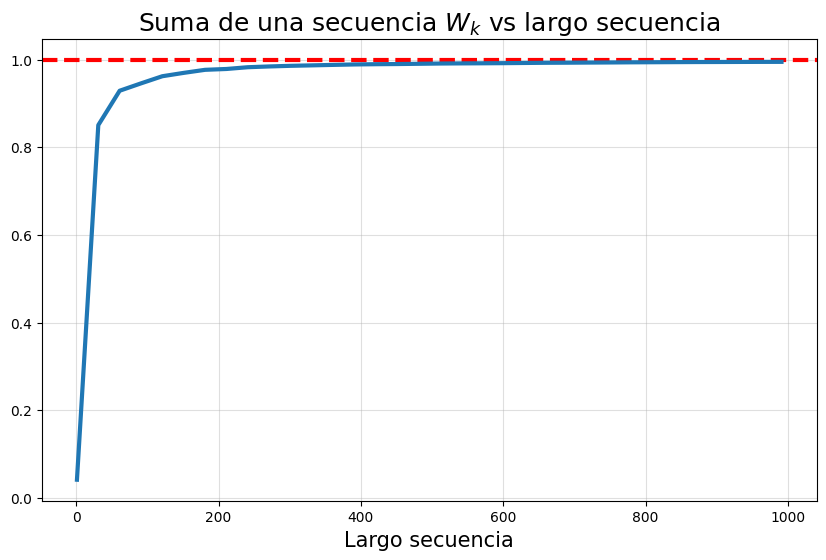

In [5]:
plt.figure(figsize=(10,6))
plt.axhline(1, lw=3, c='r', ls='--')
plt.plot(range(1,n_ks,30), sum_W_k, lw=3)
plt.title(r'Suma de una secuencia $W_k$ vs largo secuencia', size=18)
plt.xlabel('Largo secuencia', size=15)
plt.grid(alpha=0.4);

Simulemos para distintos valores de los parámetros.

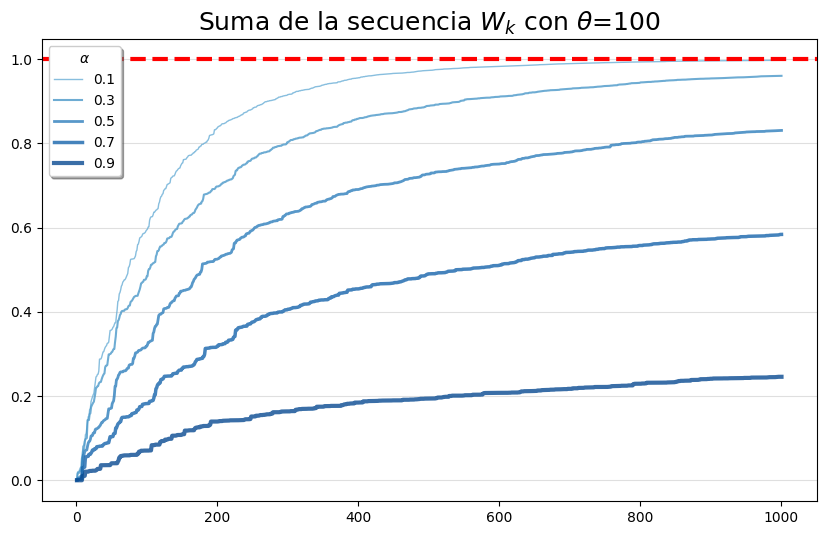

In [6]:
k = 1_000
thetas = np.linspace(1,100,20)
alphas = np.arange(0.1,1,0.2)
alpha_ = 0.5
theta_ = 100

plt.figure(figsize=(10,6))
for i, alpha in enumerate(alphas):
    plt.plot(np.arange(1,k+1), simular_seq_W_k(k, alpha, theta_).cumsum(),
             label = f'{alpha:.1f}', lw=i/2+1, alpha=0.8, c=plt.cm.Blues((i+5)/(2*len(alphas))))
plt.axhline(1, ls='--', lw=3, c='r')
plt.legend(title=r'$\alpha$', shadow=True, )
plt.title(f'Suma de la secuencia $W_k$ con $\\theta$={theta_}', size = 18)
plt.grid(axis='y', alpha = 0.4)

path = 'C:/Users/Aleja/OneDrive - Universidad Técnica Federico Santa María/Material universidad/10sem 2023-2/MAT468/MAT468_github/certamen/P3/'
plt.savefig(path+'P3a_sumas_alphas.png');

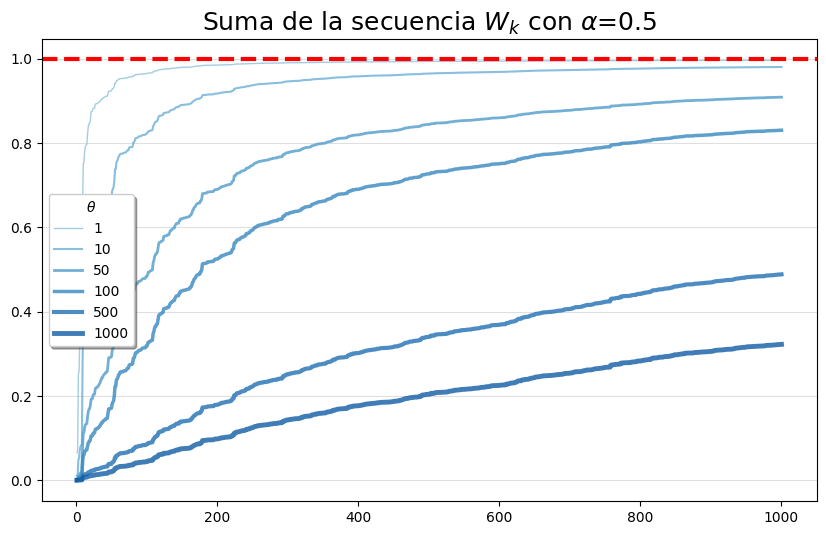

In [7]:
k = 1_000
thetas = [1, 10, 50, 100, 500, 1_000]
alpha_ = 0.5

plt.figure(figsize=(10,6))
for i, theta in enumerate(thetas):
    plt.plot(np.arange(1,k+1), simular_seq_W_k(k, alpha_, theta).cumsum(),
             label = f'{theta}', lw=i/2+1, alpha=0.8, c=plt.cm.Blues((i+5)/(2*len(thetas))))
plt.axhline(1, ls='--', lw=3, c='r')
plt.legend(title=r'$\theta$', shadow=True)
plt.title(f'Suma de la secuencia $W_k$ con $\\alpha$={alpha_}', size = 18)
plt.grid(axis='y', alpha = 0.4)
plt.savefig(path+'P3a_sumas_thetas.png');

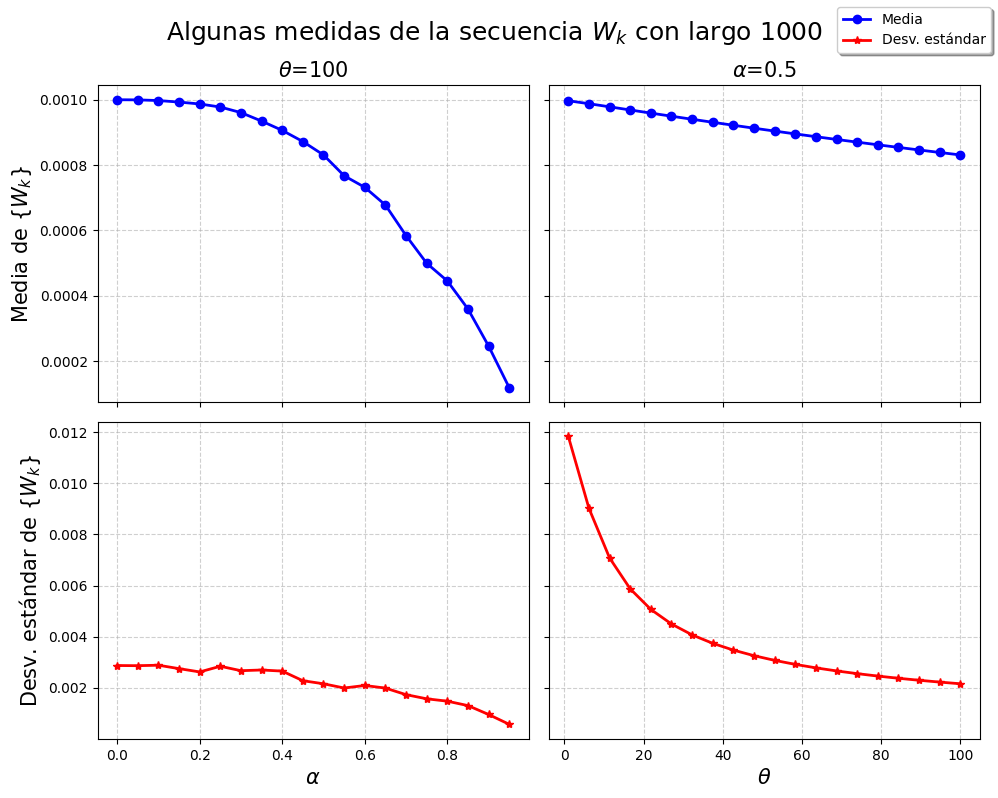

In [8]:
k = 1_000
thetas = np.linspace(1,100,20)
alphas = np.arange(0,1,0.05)
alpha_ = 0.5
theta_ = 100

simulaciones = np.hstack([simular_seq_W_k(k, alpha, theta_).reshape(k,1) for alpha in alphas])

fig, axs = plt.subplots(2,2,figsize=(10,8), sharey='row', sharex='col')
axs = axs.flatten()

axs[0].plot(alphas, simulaciones.mean(axis=0),
            marker='o', lw=2, c='b', label='Media'
            )
axs[0].set_ylabel(r'Media de $\{W_k\}$', size=15)
axs[0].set_title(f'$\\theta$={theta_}', size=15)

axs[2].plot(alphas, simulaciones.std(axis=0),
            marker='*', lw=2, c='r'
            )
axs[2].set_ylabel(r'Desv. estándar de $\{W_k\}$', size=15)
axs[2].set_xlabel(r'$\alpha$', size=15)

simulaciones = np.hstack([simular_seq_W_k(k, alpha_, theta).reshape(k,1) for theta in thetas])

axs[1].plot(thetas, simulaciones.mean(axis=0),
            marker='o', lw=2, c='b'
            )
axs[1].set_title(f'$\\alpha$={alpha_}', size=15)
axs[3].plot(thetas, simulaciones.std(axis=0),
            marker='*', lw=2, c='r', label='Desv. estándar'
            )
axs[3].set_xlabel(r'$\theta$', size=15)

for i in range(4):
    axs[i].grid(alpha=0.6, ls='--') 
    
fig.suptitle(f'Algunas medidas de la secuencia $W_k$ con largo {k}', size=18)
fig.legend(shadow=True)
fig.tight_layout()
fig.savefig(path+'P3a_medidas.png');